# Handwritten Digit Recognition ML

## Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests

## Data Preperations

### load data
(and view sample image)

This project uses the MNIST Handwritten Digit Classification Dataset

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [ ]:
mnist = tf.keras.datasets.mnist 
(input_train, target_train), (input_test, target_test) = mnist.load_data()

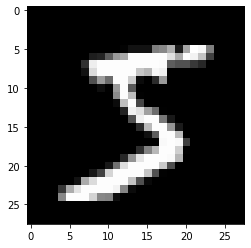

In [ ]:
plt.imshow(input_train[0], cmap="gray")
input_train[0].shape
plt.show()

### Prepare the data
(get and set input shape and normalize values)


In [ ]:
# get and set input shape
sample_shape = input_train[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)

# Normalize and Reshape data 
input_train_reshaped = tf.keras.utils.normalize(input_train, axis=1).reshape(len(input_train), input_shape[0], input_shape[1], input_shape[2])
input_test_reshaped  = tf.keras.utils.normalize(input_test, axis=1).reshape(len(input_test), input_shape[0], input_shape[1], input_shape[2])

## The Model

### Building and Compiling the Model

In [ ]:
# CNN model
model = tf.keras.models.Sequential()
 
model.add(Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(64, (3,3), padding='same', activation="relu"))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(128, (3,3), padding='same', activation="relu"))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="ADAM", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Training the Model

In [ ]:
epochs = 10

In [ ]:
model.fit(x=input_train_reshaped, y=target_train, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2107 - accuracy: 0.9327
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0639 - accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0495 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0389 - accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0341 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0275 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l

In [ ]:
test_loss, test_accuracy = model.evaluate(x=input_test_reshaped, y=target_test)
print('Accuracy on test dataset:', test_accuracy )

## Predictions

### Predictions on the Test Dataset

In [ ]:
predictions = model.predict([input_test_reshaped])

In [ ]:
for i in range(0,10):
  plt.imshow(input_test[i], cmap="gray") 
  plt.show()
  print("The digit above is:", np.argmax(predictions[i])) 

### Prediction on Unseen Data

The data below was generated using [this website](https://zivkaplan.github.io/Digit-Recognizer/) that I created to generate hand written images in the correct input resolution.

[Open source code on Github](https://https://github.com/zivkaplan/Digit-Recognizer)

In [ ]:
for i in range(1,6):
  url = "https://raw.githubusercontent.com/zivkaplan/Digit-Recognizer/main/sample_imgs/my-canvas(" + str(i) + ").jpeg"
  img = Image.open(requests.get(url, stream=True).raw)
  plt.imshow(img) 
  plt.show() 
  img = np.asarray(img)
  img = img[:,:,0] # to grayscale
  img_reshaped = tf.keras.utils.normalize(img, axis=1).reshape(1, input_shape[0], input_shape[1], input_shape[2])
  
  result = model.predict(img_reshaped)
  print("The digit above is: ", np.argmax(result), "\nAccuracy rate: ", np.amax(result))